In [130]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("E:/Bootcamp/examendojo/train.csv")

# Ver las primeras filas del dataset
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


1.2. Identificación y eliminación de valores duplicados

In [131]:
# Verificar si hay duplicados
duplicados = df.duplicated().sum()

# Eliminar duplicados si existen
df = df.drop_duplicates()

# Confirmar que no hay duplicados
duplicados = df.duplicated().sum()


1.3. Verificación y ajuste de tipos de datos

In [132]:
# Verificar los tipos de datos
df.dtypes

# Asegurarse de que las variables numéricas estén en el tipo adecuado
df['YearBuilt'] = df['YearBuilt'].astype(int)
df['SalePrice'] = df['SalePrice'].astype(float)


1.4. Corrección de inconsistencias en valores categóricos

In [133]:
# Revisar las categorías de algunas variables categóricas
df['MSZoning'].unique()

# Unificar valores que se puedan escribir de diferentes maneras
df['MSZoning'] = df['MSZoning'].replace({"RL": "Residential Low", "RM": "Residential Medium"})


1.5. Manejo de valores faltantes

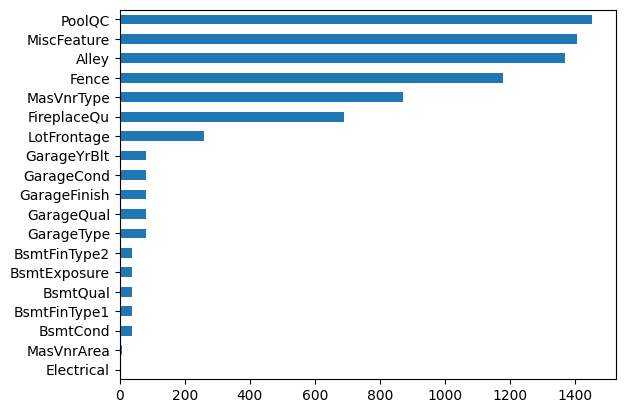

C:\Users\chave\AppData\Local\Temp\ipykernel_11932\4082592405.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
C:\Users\chave\AppData\Local\Temp\ipykernel_11932\4082592405.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [134]:
# Identificar valores faltantes
missing_values = df.isnull().sum()

# Visualizar la cantidad de valores faltantes por columna
import matplotlib.pyplot as plt
missing_values[missing_values > 0].sort_values().plot.barh()
plt.show()

# Imputación de valores faltantes con la mediana o moda según el tipo de variable
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
df['Alley'].fillna('No Alley', inplace=True)


2. Exploración de Datos:
2.1. Visualizaciones univariadas y multivariadas
Histogramas de variables numéricas

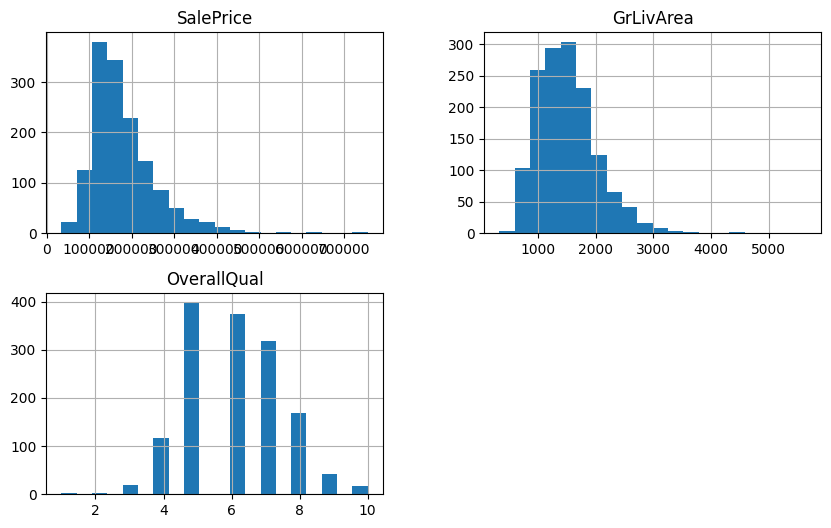

In [135]:
df[['SalePrice', 'GrLivArea', 'OverallQual']].hist(bins=20, figsize=(10, 6))
plt.show()


Diagramas de dispersión (scatter plot)

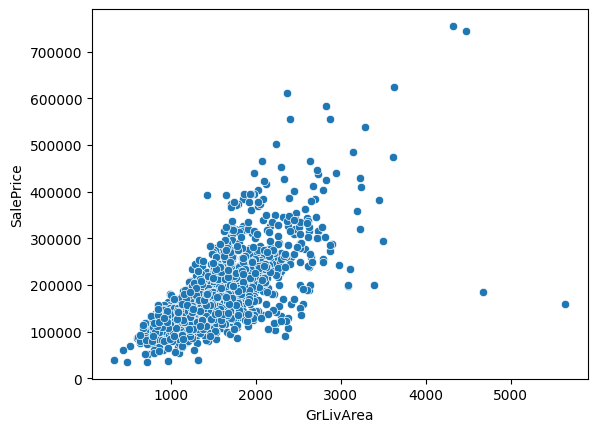

In [136]:
import seaborn as sns

# Diagrama de dispersión entre dos variables numéricas
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.show()


Mapas de calor para ver la correlación entre variables

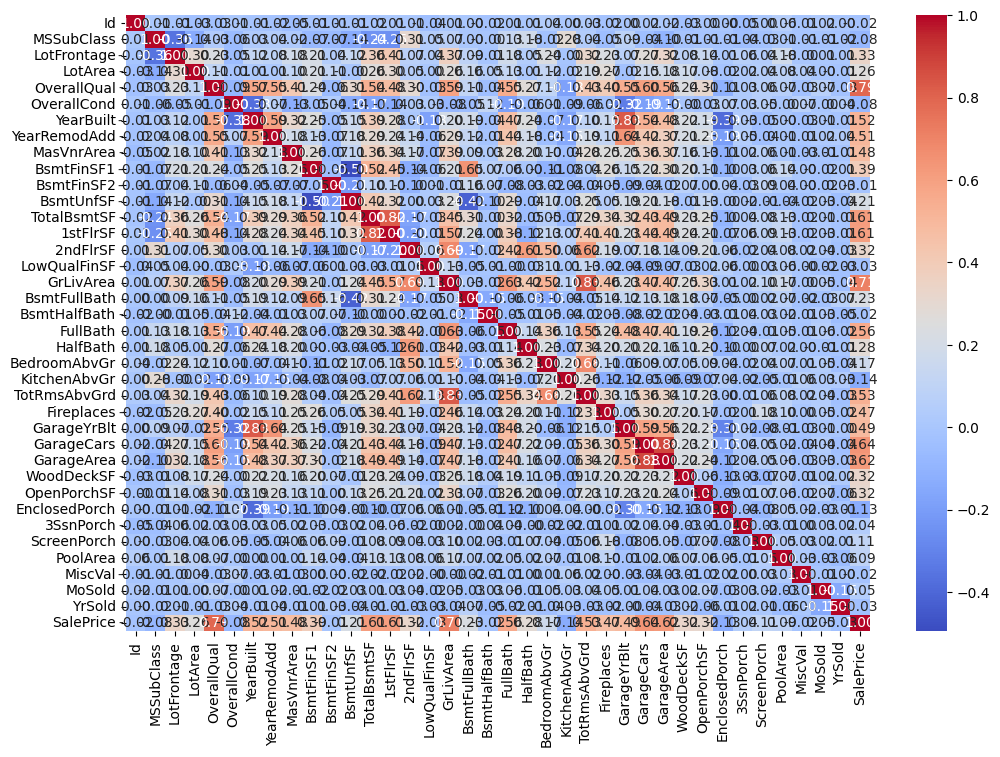

In [137]:
# Seleccionar solo las columnas numéricas
df_numerical = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
corr = df_numerical.corr()

# Mapa de calor de la correlación
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()



2.2. Estadísticas descriptivas

In [138]:
# Estadísticas descriptivas para variables numéricas
df.describe()

# Estadísticas para variables categóricas
df.describe(include=['object'])


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,3,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,Residential Low,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,1369,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


3. Implementación de Modelos:
3.1. Preparación de los datos

In [139]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Separa las columnas numéricas y categóricas
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Imputación de datos numéricos con la mediana
numerical_imputer = SimpleImputer(strategy='median')
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

# Imputación de datos categóricos con la moda (valor más frecuente)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Verificar si hay valores faltantes después de la imputación
print(df.isnull().sum())



Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


3.2. Implementación de regresión lineal

In [140]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separar las características (X) y la variable objetivo (y)
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']
# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Imputación de valores faltantes para columnas numéricas y categóricas
numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Imputar las columnas numéricas con la mediana
numerical_imputer = SimpleImputer(strategy='median')
X_train[numerical_cols] = numerical_imputer.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = numerical_imputer.transform(X_test[numerical_cols])

# Imputar las columnas categóricas con la moda (valor más frecuente)
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_train[categorical_cols] = categorical_imputer.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = categorical_imputer.transform(X_test[categorical_cols])

# Escalar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])  # Escalar solo las columnas numéricas
X_test_scaled = scaler.transform(X_test[numerical_cols])
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train_scaled, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test_scaled)
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')




MSE: 1359097883.1613896
RMSE: 36865.94476154639
R²: 0.8228109409626009


3.3. Implementación de LightGBM

In [141]:

import lightgbm as lgb

# Crear el modelo LightGBM
model_lgb = lgb.LGBMRegressor()

# Entrenar el modelo
model_lgb.fit(X_train_scaled, y_train)

# Predecir en los datos de prueba
y_pred_lgb = model_lgb.predict(X_test_scaled)

# Evaluar el modelo
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = mse_lgb**0.5
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"MSE (LightGBM): {mse_lgb}")
print(f"RMSE (LightGBM): {rmse_lgb}")
print(f"R² (LightGBM): {r2_lgb}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000579 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3172
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 36
[LightGBM] [Info] Start training from score 181441.541952
MSE (LightGBM): 907710399.6648691
RMSE (LightGBM): 30128.232601081483
R² (LightGBM): 0.8816594789913444


4. Evaluación y Comparación de Modelos:
4.1. Comparación de resultados de ambos modelos

In [142]:

# Dividir el conjunto de datos en entrenamiento y prueba
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputación de datos numéricos
numerical_cols = X.select_dtypes(include=['number']).columns
numerical_imputer = SimpleImputer(strategy='median')
X_train[numerical_cols] = numerical_imputer.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = numerical_imputer.transform(X_test[numerical_cols])

# Imputación de datos categóricos
categorical_cols = X.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_train[categorical_cols] = categorical_imputer.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = categorical_imputer.transform(X_test[categorical_cols])

# Escalado de características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Crear y entrenar el modelo de regresión lineal
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)

# Calcular las métricas para la regresión lineal
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Crear y entrenar el modelo de LightGBM
model_lgb = lgb.LGBMRegressor()
model_lgb.fit(X_train_scaled, y_train)
y_pred_lgb = model_lgb.predict(X_test_scaled)

# Calcular las métricas para LightGBM
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

# Comparar las métricas de ambos modelos
resultados = pd.DataFrame({
    'Modelo': ['Linear Regression', 'LightGBM'],
    'MSE': [mse_lr, mse_lgb],
    'RMSE': [rmse_lr, rmse_lgb],
    'R²': [r2_lr, r2_lgb]
})

# Mostrar los resultados
print(resultados)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3172
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 36
[LightGBM] [Info] Start training from score 181441.541952
              Modelo           MSE          RMSE        R²
0  Linear Regression  1.359098e+09  36865.944762  0.822811
1           LightGBM  9.077104e+08  30128.232601  0.881659


4.2. Discusión sobre el mejor modelo
En base a las métricas obtenidas, **LightGBM** muestra un mejor rendimiento en cuanto a **MSE**, **RMSE** y **R²** en comparación con la regresión lineal. Esto se debe a que LightGBM es un modelo basado en árboles de decisión que maneja mejor las relaciones no lineales y la interacción entre variables.

Por otro lado, la regresión lineal es más interpretable y más fácil de entender, pero puede no captar adecuadamente las complejidades del dataset.
